In [2]:
import pandas as pd

DATA = r'D:\Pastas\Hashtag Treinamentos\Customer Segmentation\data\Mall_Customers_no_CustomerID.csv'

df = pd.read_csv(DATA)

df.head()



,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


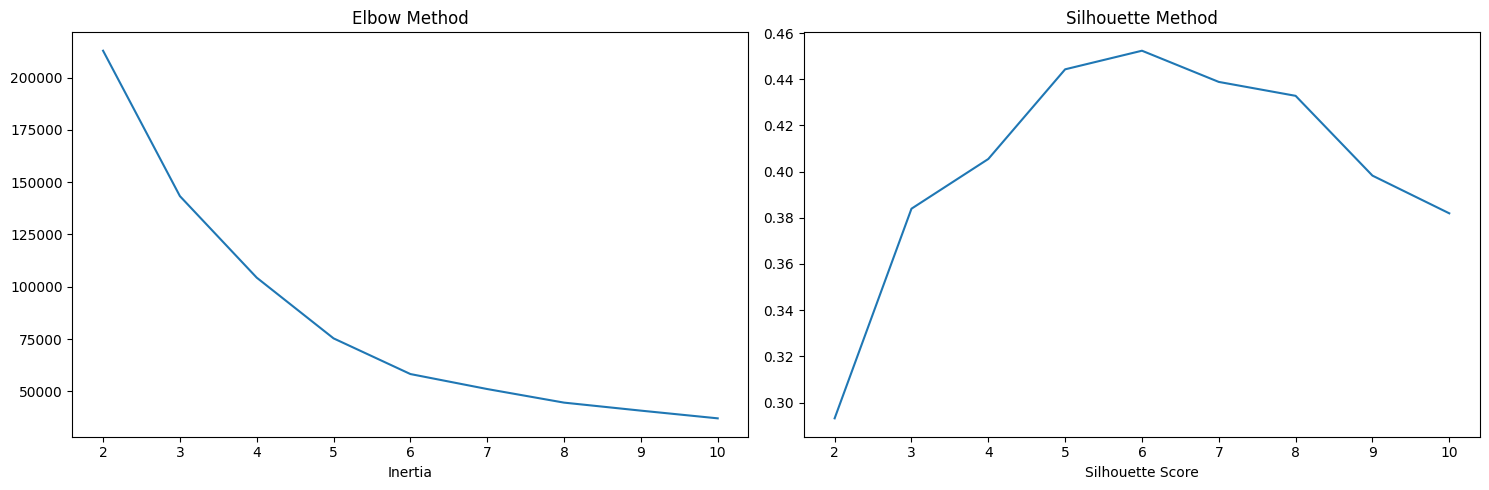

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), tight_layout=True)

elbow = {}
silhouette_scores = [] 

RANDOM_STATE = 42
k_range = range(2, 11)

X = df.drop('Gender', axis=1) 

for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(X)
    elbow[i] = kmeans.inertia_ 

    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))  

# Corrigindo o chamado ao sns.lineplot
sns.lineplot(x=list(elbow.keys()), y=list(elbow.values()), ax=axs[0])
axs[0].set_title('Elbow Method')
axs[0].set_xlabel('K')
axs[0].set_xlabel('Inertia')

sns.lineplot(x=list(k_range), y=silhouette_scores, ax=axs[1])
axs[1].set_title('Silhouette Method')
axs[1].set_xlabel('K')
axs[1].set_xlabel('Silhouette Score')

plt.show()
 
